## 機械学習
---
データの集合をもとに、自動的にデータに潜む法則性を学習・発見し、データを分類、判別すること

### 進め方
---
1. 1件ずつデータを読み込む
2. ロジスティック回帰にデータを学習(fit)させる
3. ロジスティック回帰に試しに3件予測(predict)させる
4. データとロジスティック回帰が学習した境界(直線)をプロットする

### 1. 1件ずつデータを読み込む

#### 事前準備

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# plot_regionsを定義
def plot_regions(clf, X, y):
    """ モデルが学習した領域をプロット """
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.3),
                           np.arange(x2_min, x2_max, 0.3))

    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')
    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')

#### データの読み込みと整形

In [3]:
import pandas as pd
# データをpandasで読み込み
df = pd.read_csv('jh_heights_weights.csv')

# sicikit-learnに学習させるために、身長と体重のnumpy.array, yに男性か女性かのnumpy.array
# pandasのDataFrameにdf.caluesとすると、numpy.arrayの形式でデータを取得できる
X = df[["height", "weight"]].values
y = df["y"].values

### 2. ロジスティック回帰にデータを学習(fit)させる

#### sklearn(scikit-learn)から機械学習のモデルを読み込み、初期化

In [5]:
#ロジスティック回帰をインポートする

from sklearn.linear_model import LogisticRegression

In [6]:
# 初期化をしたパラメータをハイパーパラメータと呼ぶ
lr = LogisticRegression(C=1000, random_state=0)

##### 解説
---
C=: 逆正則化パラメータ、詳細は後のクエストで学びます

random_state=1: 学習時の乱数のシード値です

####  <code>.fit\</code> を呼び出して学習させる
---
第一引数には、学習させるデータX（特徴行列）を

第二引数には、分類の答え（クラスレベル）y（目的変数）を

In [7]:
lr.fit(X, y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 3. ロジスティック回帰に試しに3件予測(predict)させる

In [8]:
lr.predict([
    (170, 50),
    (175, 60),
    (165, 70),
])

array([1, 1, 0])

### 4. データとロジスティック回帰が学習した境界(直線)をプロットする

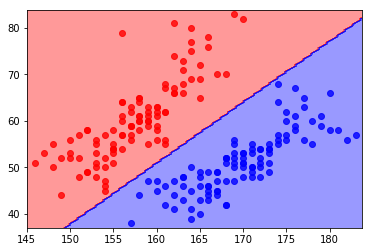

In [9]:
plot_regions(lr, X, y)
plt.show()